# Class 18: Statistical Inference and Hypothesis Testing

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Class 18 Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Define statistical inference to a freshman engineer. Give two science or engineering examples.
* Explain the central limit theorem.
* Use the central limit theorem to calculate probabilities involving the sample mean. Do this with and without standardizing. (Two approaches, same answer.)
* Explain the correct interpretation of a 95% confidence interval.
* Using a picture, explain the 68-95-99.7 to someone that just finished Calculus II.
* Calculate any size confidence interval (95%, 99%, etc.) using z- or t-distribution
 * Explain why the t-distribution is important. Relate this back to the CLT.
 * Check for the assumption required to apply the t-distribution
 * Use a confidence interval to perform hypothesis testing
* Apply the 5-step hypothesis testing procedure
 * Identify null and alternative hypotheses from a problem description
 * Calculate test statistic
 * Draw "area under curve" that corresponds to P-value for a given set of hypotheses


In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## 18g. Student's t-Distribution

**Further Reading**: §5.3 in Navidi (2015)

### 18g-i. Main Idea

What happens if the sample size is *small* and we do not know $\sigma$? Two complications:
* Cannot invoke central limit theorem
* Need to account for errors when estimating $\sigma$ (population standard deviation) using $s$ (sample standard deviation)

**Solution: Student's t-distribution**

**History Side Tangent**

Published in 1908 by William Sealy Goshet under the pseudonym *Student*.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/William_Sealy_Gosset.jpg/170px-William_Sealy_Gosset.jpg)

![](https://upload.wikimedia.org/wikipedia/en/thumb/f/fe/Guinness-original-logo.svg/220px-Guinness-original-logo.svg.png)

### 18g-ii. Degrees of Freedom and Visualization

$\nu$ is the degrees of freedom:
* Student's t-distribution converges to the Gaussian distribution as $\nu \rightarrow \infty$
* $\nu$ is often $n$ - 1. We lose 1 degree of freedom to estimate standard deviation.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/960px-Student_t_pdf.svg.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Student_t_cdf.svg/960px-Student_t_cdf.svg.png)

### 18g-iv. Comparison of $z^*$ and $t^*$

In [17]:
n = 5
print("Consider n =",n)

# calculate zstar
# argument 1: confidence level
zstar95 = stats.norm.interval(0.95)
print("\nz-star for 95% interval:",zstar95)

# calculate tstar
# argument 1: confidence level
# argument 2: degrees of freedom
tstar95 = stats.t.interval(0.95,n-1)
print("\nt-star for 95% interval:",tstar95)

# percent error
print("\nPercent error using z instead of t:",abs((1 - zstar95[0]/tstar95[0]))*100,"%")

Consider n = 5

z-star for 95% interval: (-1.959963984540054, 1.959963984540054)

t-star for 95% interval: (-2.7764451051977987, 2.7764451051977987)

Percent error using z instead of t: 29.407428914377086 %


### 18g-v. Catalyst Example Revisited


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: How would we modify our code from above to calculate a t-interval (instead of a z-interval)?
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Recalculate the confidence intervals using the t-distribution.
</div>

### 18g-vi. Important Assumptions: Population is Normally Distributed, Samples are Random

Student's t-distribution only applies if the population is normally distributed and samples are random (i.e., zero covariance). Otherwise, the significance level is not correct, i.e., we will either under- or over-estimate uncertainty.

**How to know/check if the population is normally distributed?**
* **Preferred** Examine large amounts of historical data or leverage additional knowledge.
* **Practical** Plot the sample and check for outliers.

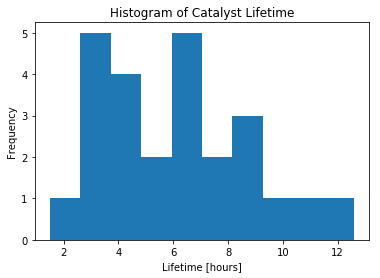

In [18]:
plt.hist(lifetime)
plt.title("Histogram of Catalyst Lifetime")
plt.xlabel("Lifetime [hours]")
plt.ylabel("Frequency")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: Are there outliers in the catalyst lifetime dataset?
</div>

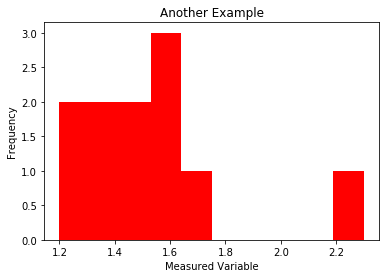

In [19]:
another_example = [1.2, 2.3, 1.5, 1.4, 1.3, 1.6, 1.4, 1.7, 1.6, 1.5, 1.6]
plt.hist(another_example,color="red")
plt.title("Another Example")
plt.xlabel("Measured Variable")
plt.ylabel("Frequency")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: What about this dataset? Does it contain any outliers?
</div>

**Another Example:** Time Series Data.

Below are two plots of yield versus time data for two chemical processes.

![](https://drive.google.com/uc?export=view&id=1izl_-WD7yZk40QA3F9wHeiRd9V6-SMyW)

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: Can you use these data to calculate a confidence intervals for the average yield of each process using a t-distribution?
</div>